# Best Location to Open a Hotel in London Code

### Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

!pip -q install folium
import folium

import requests

from sklearn.cluster import KMeans

print("Imports Complete")

Imports Complete


## Part 1: Gathering and Cleaning Up Data

Import crime data. This data was taken from the UK Government's website, found here: https://data.london.gov.uk/dataset/recorded_crime_summary. The data taken refers to the crime rates in terms of boroughs in London from 2018 to June 2020. 

In [2]:
# The code was removed by Watson Studio for sharing.

,MajorText,MinorText,LookUp_BoroughName,201807,201808,201809,201810,201811,201812,201901,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,5,3,8,5,1,5,...,6,9,8,6,4,5,6,2,2,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,127,101,107,132,105,88,97,...,109,109,97,121,97,103,107,80,86,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,30,18,33,32,39,33,45,...,37,30,30,25,31,17,28,29,16,16
3,Burglary,Burglary - Residential,Barking and Dagenham,94,84,99,94,106,164,114,...,80,97,114,130,116,123,97,57,41,63
4,Drug Offences,Drug Trafficking,Barking and Dagenham,8,7,10,7,7,4,5,...,7,8,13,3,14,5,6,12,12,7


In [3]:
df_crime.shape

(1569, 27)

Find the total number of crimes and find the total number of crimes per borough. First check if there are any NA values in df_crime

In [4]:
df_crime.isnull().values.any()

False

In [5]:
df_crime.loc[:,'Total'] = df_crime.sum(axis=1)
df_crime.head()

,MajorText,MinorText,LookUp_BoroughName,201807,201808,201809,201810,201811,201812,201901,...,201910,201911,201912,202001,202002,202003,202004,202005,202006,Total
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,5,3,8,5,1,5,...,9,8,6,4,5,6,2,2,4,119
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,127,101,107,132,105,88,97,...,109,97,121,97,103,107,80,86,121,2687
2,Burglary,Burglary - Business and Community,Barking and Dagenham,30,18,33,32,39,33,45,...,30,30,25,31,17,28,29,16,16,683
3,Burglary,Burglary - Residential,Barking and Dagenham,94,84,99,94,106,164,114,...,97,114,130,116,123,97,57,41,63,2323
4,Drug Offences,Drug Trafficking,Barking and Dagenham,8,7,10,7,7,4,5,...,8,13,3,14,5,6,12,12,7,181


In [6]:
df_crime = df_crime.drop(df_crime.loc[:, '201807':'202006'].columns, axis = 1)
df_crime.head()

,MajorText,MinorText,LookUp_BoroughName,Total
0,Arson and Criminal Damage,Arson,Barking and Dagenham,119
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2687
2,Burglary,Burglary - Business and Community,Barking and Dagenham,683
3,Burglary,Burglary - Residential,Barking and Dagenham,2323
4,Drug Offences,Drug Trafficking,Barking and Dagenham,181


In [7]:
df_crime = df_crime.drop(columns = ['MajorText','MinorText'], axis = 1)
df_crime.head()

,LookUp_BoroughName,Total
0,Barking and Dagenham,119
1,Barking and Dagenham,2687
2,Barking and Dagenham,683
3,Barking and Dagenham,2323
4,Barking and Dagenham,181


In [8]:
df_crime = df_crime.rename(columns = {'LookUp_BoroughName':'Borough','Total':'Total Crime'})
df_crime.head()

,Borough,Total Crime
0,Barking and Dagenham,119
1,Barking and Dagenham,2687
2,Barking and Dagenham,683
3,Barking and Dagenham,2323
4,Barking and Dagenham,181


In [9]:
df_crime = df_crime.groupby(['Borough']).agg('sum')
df_crime

,Total Crime
Borough,
Barking and Dagenham,38788
Barnet,59213
Bexley,33692
Brent,59921
Bromley,47612
Camden,72764
Croydon,66117
Ealing,60522
Enfield,58648


In [10]:
df_crime.shape

(33, 1)

Because London Heathrow and London Airports are so far removed from Central London, I will drop the row.

In [11]:
df_crime = df_crime.drop(index = 'London Heathrow and London City Airports')
df_crime

,Total Crime
Borough,
Barking and Dagenham,38788
Barnet,59213
Bexley,33692
Brent,59921
Bromley,47612
Camden,72764
Croydon,66117
Ealing,60522
Enfield,58648


In [12]:
df_crime = df_crime.reset_index(drop = False)
df_crime.head()

,Borough,Total Crime
0,Barking and Dagenham,38788
1,Barnet,59213
2,Bexley,33692
3,Brent,59921
4,Bromley,47612


In [13]:
latlong_data = [[51.5541,  0.1340],[51.6569, -0.1949],[51.4399,  0.1543],[51.5673, -0.2711],[51.4060,  0.0132],
                [51.5455,  0.1628],[51.3762, -0.0982],[51.5133, -0.3043],[51.6523, -0.0807],[51.4934,  0.0098],
                [51.5734, -0.0724],[51.4990, -0.2291],[51.5906, -0.1110],[51.5806, -0.3420],[51.5779,  0.2121],
                [51.5378, -0.4511],[51.4609, -0.3731],[51.5465, -0.1058],[51.4991, -0.1938],[51.4123, -0.3007],
                [51.4571, -0.1231],[51.4415, -0.0117],[51.4098, -0.2108],[51.5255,  0.0352],[51.5886,  0.0824],
                [51.4613, -0.3037],[51.5028, -0.0877],[51.3614, -0.1940],[51.5203, -0.0293],[51.5886, -0.0118],
                [51.4568, -0.1897],[51.5145, -0.1595]]
latlong_df = pd.DataFrame(latlong_data, columns = ['Latitude', 'Longitude'])
latlong_df.head()

,Latitude,Longitude
0,51.5541,0.1340
1,51.6569,-0.1949
2,51.4399,0.1543
3,51.5673,-0.2711
4,51.4060,0.0132


In [14]:
df_crime = df_crime.merge(latlong_df, left_index=True, right_index=True)
df_crime

,Borough,Total Crime,Latitude,Longitude
0,Barking and Dagenham,38788,51.5541,0.1340
1,Barnet,59213,51.6569,-0.1949
2,Bexley,33692,51.4399,0.1543
3,Brent,59921,51.5673,-0.2711
4,Bromley,47612,51.4060,0.0132
5,Camden,72764,51.5455,0.1628
6,Croydon,66117,51.3762,-0.0982
7,Ealing,60522,51.5133,-0.3043
8,Enfield,58648,51.6523,-0.0807
9,Greenwich,54851,51.4934,0.0098


In [15]:
# The code was removed by Watson Studio for sharing.

Visualise boroughs

In [16]:
# London Latitude and Longitude
london_lat = 51.5074
london_long = -0.1278

In [17]:
london_map = folium.Map(location=[london_lat, london_long], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_crime['Latitude'], df_crime['Longitude'], df_crime['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(london_map)  
    
london_map

Add distance of boroughs from central London based on latitude and longitude values in km to 4 s.f.:

In [18]:
distance_data = [[18.84],[17.26],[20.93],[11.94],[14.92],[20.55],[14.73],[12.23],[16.44],[9.651],[8.279],[7.073],[9.324],[16.9],
                 [24.78],[22.62],[17.76],[4.606],[4.661],[15.98],[5.603],[10.88],[12.28],[11.46],[17.11],[13.21],[2.822],[16.87],
                 [6.965],[12.08],[7.073],[2.331]]
distance_df = pd.DataFrame(distance_data, columns = ['Distance from Central London'])
distance_df.head()

,Distance from Central London
0,18.84
1,17.26
2,20.93
3,11.94
4,14.92


In [19]:
df_crime = df_crime.merge(distance_df, left_index=True, right_index=True)
df_crime

,Borough,Total Crime,Latitude,Longitude,Distance from Central London
0,Barking and Dagenham,38788,51.5541,0.1340,18.840
1,Barnet,59213,51.6569,-0.1949,17.260
2,Bexley,33692,51.4399,0.1543,20.930
3,Brent,59921,51.5673,-0.2711,11.940
4,Bromley,47612,51.4060,0.0132,14.920
5,Camden,72764,51.5455,0.1628,20.550
6,Croydon,66117,51.3762,-0.0982,14.730
7,Ealing,60522,51.5133,-0.3043,12.230
8,Enfield,58648,51.6523,-0.0807,16.440
9,Greenwich,54851,51.4934,0.0098,9.651


Collect train station, restaurants, bars and theatres venues data from Foursqaure API

In [20]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

borough_latitude = df_crime.loc[0, 'Latitude'] # neighborhood latitude value
borough_longitude = df_crime.loc[0, 'Longitude'] # neighborhood longitude value

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)

In [21]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [22]:
london_venues = getNearbyVenues(names=df_crime['Borough'],
                                   latitudes=df_crime['Latitude'],
                                   longitudes=df_crime['Longitude'],
                                  )
london_venues

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5541,0.1340,Martins Corner,51.551866,0.130512,Plaza
1,Barking and Dagenham,51.5541,0.1340,Valence House Museum,51.557983,0.134068,History Museum
2,Barking and Dagenham,51.5541,0.1340,Co-op Food,51.558339,0.128769,Grocery Store
3,Barking and Dagenham,51.5541,0.1340,Sir-apparel,51.558789,0.139661,Clothing Store
4,Barking and Dagenham,51.5541,0.1340,Five Elms Off Licence,51.553878,0.145531,Liquor Store
5,Barking and Dagenham,51.5541,0.1340,Connor Road Bus Stop,51.554345,0.147162,Bus Stop
6,Barking and Dagenham,51.5541,0.1340,Oglethorpe Road Bus Stop,51.555221,0.147136,Bus Stop
7,Barking and Dagenham,51.5541,0.1340,New China Gold,51.561269,0.141839,Chinese Restaurant
8,Barnet,51.6569,-0.1949,Ye Old Mitre Inne,51.652940,-0.199507,Pub
9,Barnet,51.6569,-0.1949,Joie de Vie,51.653659,-0.201288,Bakery


Remove all rows in Venue Categories except 'Restaurant,' 'Bar', 'Pub', 'Theatre', 'Train', 'Bus', 'Taxi', 'Metro' and 'Tram' categories. There were no venues for 'Rail' and 'Taxi'.

In [23]:
selected_venues = london_venues[london_venues['Venue Category'].isin(['Restaurant', 'Bar', 'Pub','Theater','Train','Train Station','Train Platform'
                                                                      'Bus Stop', 'Bus Station', 'Bus Line','Metro Station','Tram Station']) ]
selected_venues.reset_index(drop=True)

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barnet,51.6569,-0.1949,Ye Old Mitre Inne,51.652940,-0.199507,Pub
1,Barnet,51.6569,-0.1949,The Black Horse,51.653075,-0.206719,Pub
2,Barnet,51.6569,-0.1949,The Monken Holt,51.658288,-0.201187,Pub
3,Barnet,51.6569,-0.1949,Dudley's Pancake House,51.652965,-0.199625,Restaurant
4,Barnet,51.6569,-0.1949,Savoro Restaurant with Rooms - London,51.656956,-0.201361,Restaurant
5,Barnet,51.6569,-0.1949,High Barnet London Underground Station,51.650717,-0.194604,Metro Station
6,Bexley,51.4399,0.1543,King's Head,51.441730,0.149785,Pub
7,Bexley,51.4399,0.1543,The George,51.441756,0.150429,Pub
8,Bromley,51.4060,0.0132,Barrel & Horn,51.405887,0.013701,Bar
9,Bromley,51.4060,0.0132,The Partridge,51.405615,0.013901,Pub


## Step 2: Analysis

Visually explore data

In [24]:
kclusters = 32
london_venues_clustering = selected_venues.drop(['Borough','Venue','Venue Category'], 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_venues_clustering)
kmeans.labels_[0:31]
selected_venues.insert(0, 'Cluster Labels', kmeans.labels_)
selected_venues.head()

,Cluster Labels,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
8,11,Barnet,51.6569,-0.1949,Ye Old Mitre Inne,51.652940,-0.199507,Pub
11,11,Barnet,51.6569,-0.1949,The Black Horse,51.653075,-0.206719,Pub
15,11,Barnet,51.6569,-0.1949,The Monken Holt,51.658288,-0.201187,Pub
18,11,Barnet,51.6569,-0.1949,Dudley's Pancake House,51.652965,-0.199625,Restaurant
29,11,Barnet,51.6569,-0.1949,Savoro Restaurant with Rooms - London,51.656956,-0.201361,Restaurant


In [25]:
map_clusters = folium.Map(location=[london_lat, london_long], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(selected_venues['Venue Latitude'], selected_venues['Venue Longitude'], selected_venues['Borough'], selected_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

What we can deduce here is that the boroughs that are nearest to central london have a higher density of pubs, bars, restaurants, theaters and transportation. Thus making them better suited for a hotel.

In [39]:
selected_venues[selected_venues['Cluster Labels'] == 0]       #Kensington and Chelsea Cluster

,Cluster Labels,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
827,0,Kensington and Chelsea,51.4991,-0.1938,The Ivy Kensington Brasserie,51.501453,-0.192156,Restaurant
847,0,Kensington and Chelsea,51.4991,-0.1938,Builders Arms,51.499367,-0.188240,Pub
849,0,Kensington and Chelsea,51.4991,-0.1938,The Scarsdale Tavern,51.496975,-0.199024,Pub
857,0,Kensington and Chelsea,51.4991,-0.1938,Launceston Place,51.499215,-0.185340,Restaurant
859,0,Kensington and Chelsea,51.4991,-0.1938,Elephant & Castle,51.502938,-0.193585,Pub
861,0,Kensington and Chelsea,51.4991,-0.1938,Devonshire Arms,51.496769,-0.192451,Pub
878,0,Kensington and Chelsea,51.4991,-0.1938,Ffiona’s,51.504203,-0.192709,Restaurant
885,0,Kensington and Chelsea,51.4991,-0.1938,The Belvedere,51.501859,-0.204147,Restaurant
890,0,Kensington and Chelsea,51.4991,-0.1938,Kings Head,51.493438,-0.192563,Pub
897,0,Kensington and Chelsea,51.4991,-0.1938,"The Churchill Arms, Kensington",51.506912,-0.194801,Pub


In [40]:
selected_venues.loc[selected_venues['Cluster Labels'] == 0].shape

(12, 8)

In [43]:
selected_venues.loc[selected_venues['Cluster Labels'] == 23]     #Hammersmith and Fullham Cluster

,Cluster Labels,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
445,23,Hammersmith and Fulham,51.499,-0.2291,Andover Arms,51.496909,-0.232632,Pub
452,23,Hammersmith and Fulham,51.499,-0.2291,Anglesea Arms,51.498574,-0.235297,Pub
453,23,Hammersmith and Fulham,51.499,-0.2291,Lyric Hammersmith,51.493078,-0.226139,Theater
454,23,Hammersmith and Fulham,51.499,-0.2291,The Draft House - Hammersmith,51.494208,-0.224121,Bar
462,23,Hammersmith and Fulham,51.499,-0.2291,The Queen's Head,51.495975,-0.220711,Pub
470,23,Hammersmith and Fulham,51.499,-0.2291,Bush Theatre,51.505348,-0.225863,Theater
481,23,Hammersmith and Fulham,51.499,-0.2291,Flynn's Pub and Kitchen,51.495037,-0.234638,Pub
490,23,Hammersmith and Fulham,51.499,-0.2291,The Oak W12,51.499793,-0.238024,Bar
503,23,Hammersmith and Fulham,51.499,-0.2291,Crown & Sceptre,51.503470,-0.236380,Pub
512,23,Hammersmith and Fulham,51.499,-0.2291,The Eagle,51.500600,-0.239431,Pub


In [42]:
selected_venues.loc[selected_venues['Cluster Labels'] == 23].shape

(13, 8)

In [28]:
df_crime_high = df_crime.sort_values(['Total Crime'], ascending=False)
df_crime_high.head()

,Borough,Total Crime,Latitude,Longitude,Distance from Central London
31,Westminster,142096,51.5145,-0.1595,2.331
26,Southwark,73726,51.5028,-0.0877,2.822
5,Camden,72764,51.5455,0.1628,20.550
23,Newham,70182,51.5255,0.0352,11.460
20,Lambeth,68701,51.4571,-0.1231,5.603


Westminster has a signifcantly higher crime rate than the rest of the borough, so they will have to be avoided for the hotel

In [29]:
df_crime_low = df_crime.sort_values(['Total Crime'], ascending = True)
df_crime_low.head()

,Borough,Total Crime,Latitude,Longitude,Distance from Central London
19,Kingston upon Thames,25301,51.4123,-0.3007,15.98
25,Richmond upon Thames,25401,51.4613,-0.3037,13.21
27,Sutton,26888,51.3614,-0.1940,16.87
22,Merton,28114,51.4098,-0.2108,12.28
13,Harrow,32856,51.5806,-0.3420,16.90


Kingston upon Thames and Richmond upon Thames have the lowest crime rates, and have the added bonus of being near central London - making them more ideal spots for a hotel. The recommended hotel opening location will be discussed in the report

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

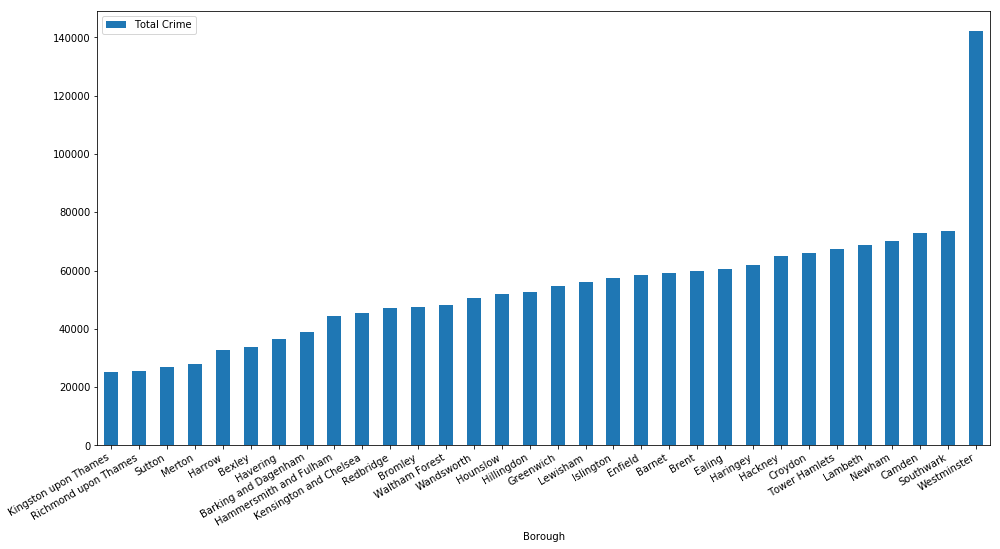

In [30]:
ax = df_crime_low.plot.bar(x='Borough', y='Total Crime', rot=0, figsize=(16,8))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [31]:
df_distance_far = df_crime.sort_values(['Distance from Central London'], ascending = False)
df_distance_far.head()

,Borough,Total Crime,Latitude,Longitude,Distance from Central London
14,Havering,36671,51.5779,0.2121,24.78
15,Hillingdon,52485,51.5378,-0.4511,22.62
2,Bexley,33692,51.4399,0.1543,20.93
5,Camden,72764,51.5455,0.1628,20.55
0,Barking and Dagenham,38788,51.5541,0.1340,18.84


These boroughs will not be used in the final consideration for the best hotel location since they are significantly too far away from central London.

In [32]:
df_distance_close = df_crime.sort_values(['Distance from Central London'], ascending = True)
df_distance_close.head()

,Borough,Total Crime,Latitude,Longitude,Distance from Central London
31,Westminster,142096,51.5145,-0.1595,2.331
26,Southwark,73726,51.5028,-0.0877,2.822
17,Islington,57367,51.5465,-0.1058,4.606
18,Kensington and Chelsea,45364,51.4991,-0.1938,4.661
20,Lambeth,68701,51.4571,-0.1231,5.603


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

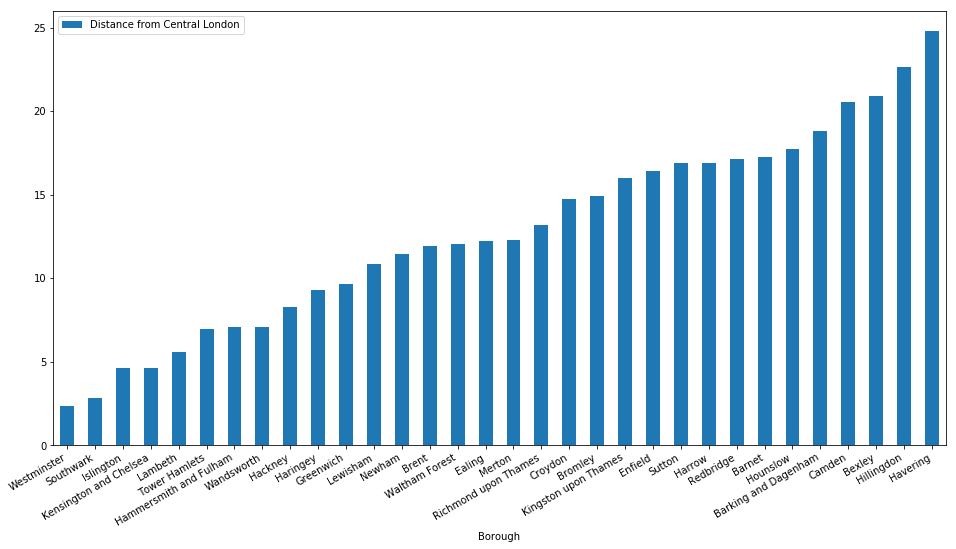

In [33]:
ax = df_distance_close.plot.bar(x='Borough', y='Distance from Central London', rot=0, figsize=(16,8))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

These are the closest to central London, however Westminster will have to be avoided due to it's high crime rates.

Correlation between Distance to London and Total Crime Between 2018 to 2020

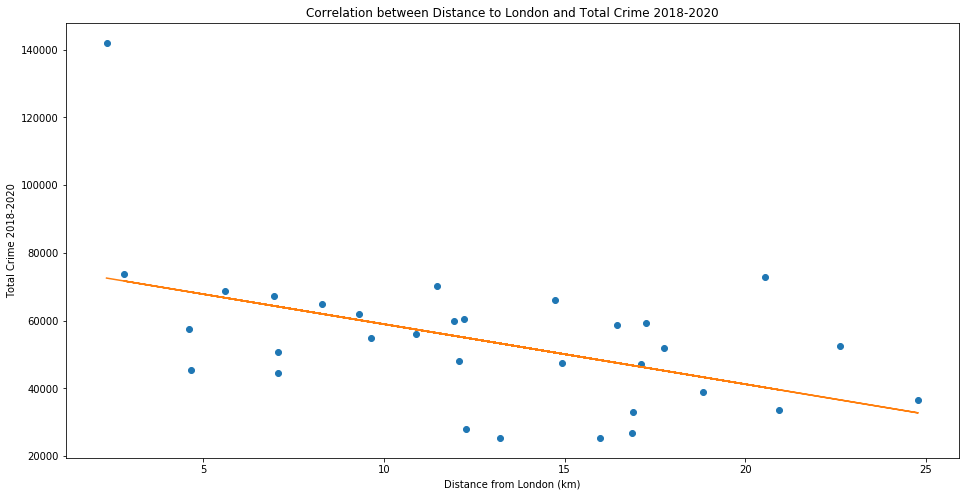

The R squared is: 0.2353590459578626


In [34]:
x = df_crime['Distance from Central London']
y = df_crime['Total Crime']
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(16, 8))
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

plt.title('Correlation between Distance to London and Total Crime 2018-2020')
plt.xlabel('Distance from London (km)')
plt.ylabel('Total Crime 2018-2020')
plt.show()

correlation_matrix = np.corrcoef(x, y)
correlation = correlation_matrix[0,1]
r_2 = correlation**2

print('The R squared is:',r_2)

Remove Westminster outlier

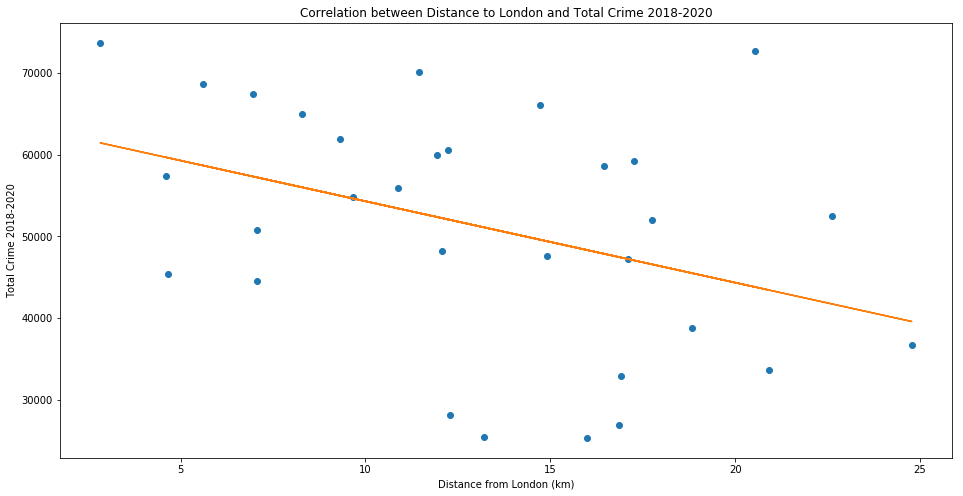

The R squared is: 0.15004275593413904


In [35]:
df_crime_drop = df_crime.drop(index = 31, axis=0)

x = df_crime_drop['Distance from Central London']
y = df_crime_drop['Total Crime']
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(16, 8))
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

plt.title('Correlation between Distance to London and Total Crime 2018-2020')
plt.xlabel('Distance from London (km)')
plt.ylabel('Total Crime 2018-2020')
plt.show()

correlation_matrix = np.corrcoef(x, y)
correlation = correlation_matrix[0,1]
r_2 = correlation**2

print('The R squared is:',r_2)

See 'Capstone Project Report' for a more detailed analysis plus the recommendation for best location to open a hotel in London